In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1041,6.9,0.49,0.19,1.7,0.079,13.0,26.0,0.99547,3.38,0.64,9.8,6
1350,9.0,0.60,0.29,2.0,0.069,32.0,73.0,0.99654,3.34,0.57,10.0,5
1349,6.9,0.57,0.00,2.8,0.081,21.0,41.0,0.99518,3.41,0.52,10.8,5
898,8.3,0.31,0.39,2.4,0.078,17.0,43.0,0.99444,3.31,0.77,12.5,7
419,6.8,0.77,0.00,1.8,0.066,34.0,52.0,0.99760,3.62,0.68,9.9,5
534,10.0,0.48,0.24,2.7,0.102,13.0,32.0,1.00000,3.28,0.56,10.0,6
1356,6.1,0.34,0.25,1.8,0.084,4.0,28.0,0.99464,3.36,0.44,10.1,5
782,9.0,0.82,0.05,2.4,0.081,26.0,96.0,0.99814,3.36,0.53,10.0,5
384,7.7,0.51,0.28,2.1,0.087,23.0,54.0,0.99800,3.42,0.74,9.2,5
1579,6.2,0.56,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
#as we can only [5, 6, 7, 4, 8, 3] values are defining wine quality
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}


df['quality'] = df['quality'].map(quality_mapping)

In [7]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df=df.sample(frac=1).reset_index(drop=True)

df_train = df.head(1000)

df_test = df.tail(df.shape[0]-1000)

In [24]:
from sklearn import tree
from sklearn import metrics

max_depth = 7

clf = tree.DecisionTreeClassifier(max_depth=max_depth)

cols_in_use = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [25]:
clf.fit(df_train[cols_in_use], df_train['quality'])

DecisionTreeClassifier(max_depth=7)

In [26]:
train_predicitons = clf.predict(df_train[cols_in_use])

test_predicitons = clf.predict(df_test[cols_in_use])

train_accuracy = round(metrics.accuracy_score(df_train['quality'], train_predicitons), 2)

test_accuracy = round(metrics.accuracy_score(df_test['quality'], test_predicitons), 2)

print(f"Train accuracy: {train_accuracy}, Test accuracy: {test_accuracy}")

Train accuracy: 0.75, Test accuracy: 0.57


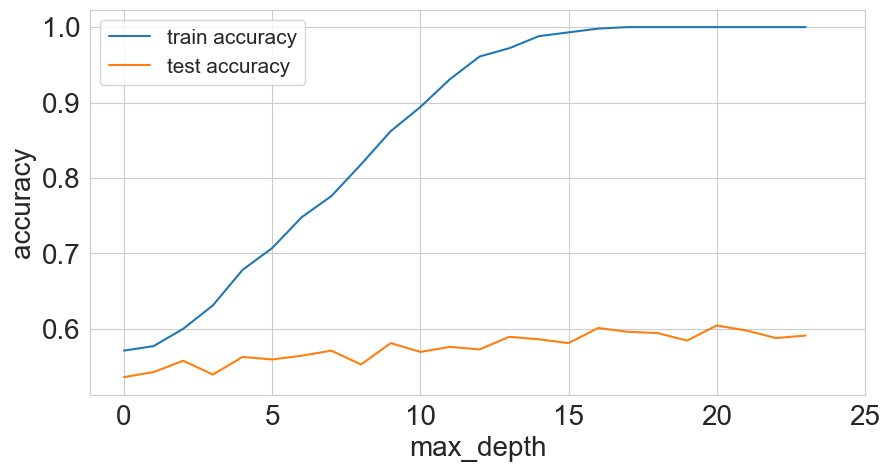

In [35]:
from sklearn import tree
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

%matplotlib inline
train_accuracies = []
test_accuracies = []

for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    cols_in_use = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
    clf.fit(df_train[cols_in_use], df_train['quality'])

    train_predicitons = clf.predict(df_train[cols_in_use])
    test_predicitons = clf.predict(df_test[cols_in_use])

    train_accuracy = metrics.accuracy_score(train_predicitons, df_train['quality'])
    test_accuracy = metrics.accuracy_score(test_predicitons, df_test['quality'])

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()